Project on Insurance Claim Prediction

In [1]:
#importing essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/synthetic_insurance_data.csv")

In [3]:
data.head(10)

,CustomerID,Age,Gender,Region,InsuranceType,PolicyTenure,PremiumAmount,Claimed,ClaimAmount
0,1,56,Male,North,Property,5,14085.60,0,0.00
1,2,69,Male,South,Life,3,11022.60,0,0.00
2,3,46,Male,West,Property,29,4750.67,0,0.00
3,4,32,Female,North,Vehicle,28,14235.89,0,0.00
4,5,60,Male,West,Health,29,24650.46,0,0.00
5,6,25,Male,South,Property,9,18138.42,0,0.00
6,7,38,Male,North,Property,20,14922.96,0,0.00
7,8,56,Female,East,Property,6,13948.44,0,0.00
8,9,36,Female,South,Property,18,15089.86,0,0.00
9,10,40,Male,East,Health,6,17188.48,1,44509.46


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     1000 non-null   int64  
 1   Age            1000 non-null   int64  
 2   Gender         1000 non-null   object 
 3   Region         1000 non-null   object 
 4   InsuranceType  1000 non-null   object 
 5   PolicyTenure   1000 non-null   int64  
 6   PremiumAmount  1000 non-null   float64
 7   Claimed        1000 non-null   int64  
 8   ClaimAmount    1000 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


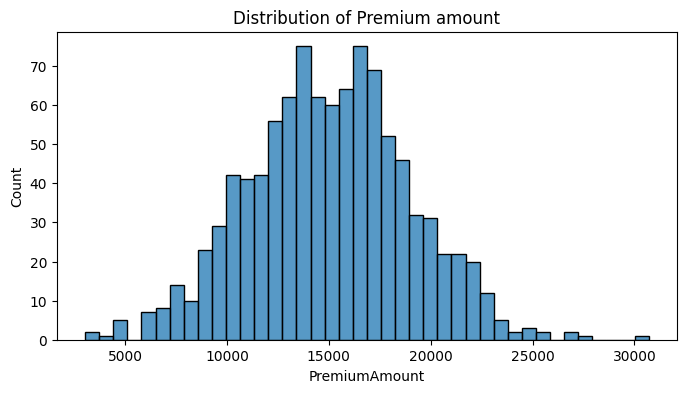

In [5]:
#histogram representation of premium distribution
plt.figure(figsize=(8,4))
sns.histplot(data['PremiumAmount'],bins=40)
plt.title("Distribution of Premium amount")
plt.show()

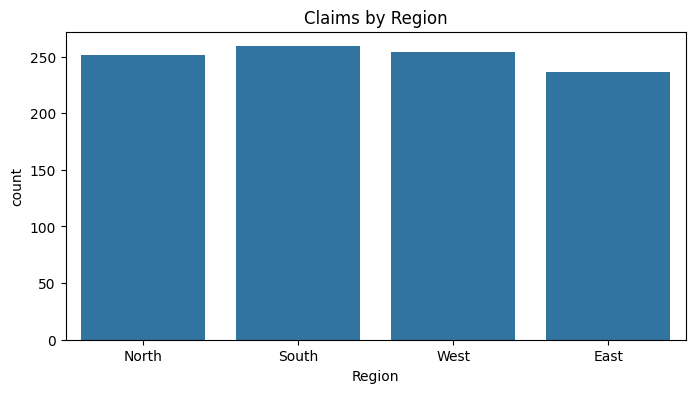

In [6]:
#Claim frequency by region
plt.figure(figsize=(8,4))
sns.countplot(x='Region',data=data)
plt.title("Claims by Region")
plt.show()

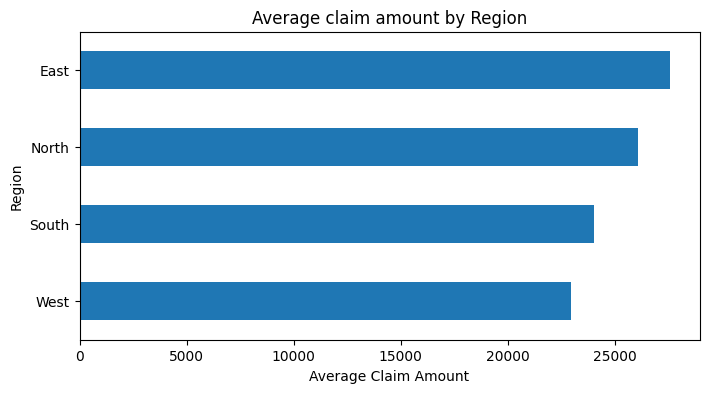

In [7]:
#Average Claim Amount by Region
plt.figure(figsize=(8,4))
region_claims=data[data['Claimed']==1].groupby('Region')['ClaimAmount'].mean().sort_values()
region_claims.plot(kind='barh')
plt.title("Average claim amount by Region")
plt.xlabel("Average Claim Amount")
plt.show()

In [8]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
data['InsuranceType'].unique()

array(['Property', 'Life', 'Vehicle', 'Health'], dtype=object)

In [10]:
data['Region'].unique()

array(['North', 'South', 'West', 'East'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
data['Gender']=le.fit_transform(data['Gender'])

In [13]:
data['Gender'].unique()

array([1, 0])

In [14]:
data['InsuranceType']=le.fit_transform(data['InsuranceType'])

In [15]:
data['InsuranceType'].unique()

array([2, 1, 3, 0])

In [16]:
data['Region']=le.fit_transform(data['Region'])

In [17]:
data['Region'].unique()

array([1, 2, 3, 0])

In [18]:
data.head(10)

,CustomerID,Age,Gender,Region,InsuranceType,PolicyTenure,PremiumAmount,Claimed,ClaimAmount
0,1,56,1,1,2,5,14085.60,0,0.00
1,2,69,1,2,1,3,11022.60,0,0.00
2,3,46,1,3,2,29,4750.67,0,0.00
3,4,32,0,1,3,28,14235.89,0,0.00
4,5,60,1,3,0,29,24650.46,0,0.00
5,6,25,1,2,2,9,18138.42,0,0.00
6,7,38,1,1,2,20,14922.96,0,0.00
7,8,56,0,0,2,6,13948.44,0,0.00
8,9,36,0,2,2,18,15089.86,0,0.00
9,10,40,1,0,0,6,17188.48,1,44509.46


In [19]:
df=data.drop(['CustomerID'],axis=1)

In [20]:
df.head()

,Age,Gender,Region,InsuranceType,PolicyTenure,PremiumAmount,Claimed,ClaimAmount
0,56,1,1,2,5,14085.60,0,0.0
1,69,1,2,1,3,11022.60,0,0.0
2,46,1,3,2,29,4750.67,0,0.0
3,32,0,1,3,28,14235.89,0,0.0
4,60,1,3,0,29,24650.46,0,0.0


In [21]:
x=df[['Age','Gender','Region','InsuranceType','PolicyTenure','PremiumAmount','Claimed']] #input independent features
y=df['ClaimAmount'] #output target dependent feature

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85) #85% data is used for training the model and rest 15% is used for testing the performance

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [44]:
model.fit(x_train,y_train)

LinearRegression()

In [45]:
predictions=model.predict(x_test)

In [46]:
model.score(x,y)

0.7448679445531232